Import packages

In [36]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [37]:
cpu = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [38]:
input = 28
seq = 28
hidden_size = 128
layers = 2
classes = 10
alpha = 0.001

In [40]:
train_x = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(),  download=True)
test_x = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_y = torch.utils.data.DataLoader(dataset=train_x, batch_size=150, shuffle=True)
test_y = torch.utils.data.DataLoader(dataset=test_x, batch_size=150, shuffle=False)

RNN function

In [41]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, classes):
        super(RNN, self).__init__()
        self.num_layers = layers
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, classes)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(cpu) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(cpu)
        
        output, _ = self.lstm(x, (h0,c0))
        output = output[:, -1, :]
        output = self.fc(output)
        return output

In [42]:
model = RNN(input, hidden_size, layers, classes).to(cpu)



*   Cross Entropy Loss
*   Loss Optimization 



In [89]:
cr_en_loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=alpha)

MNIST data

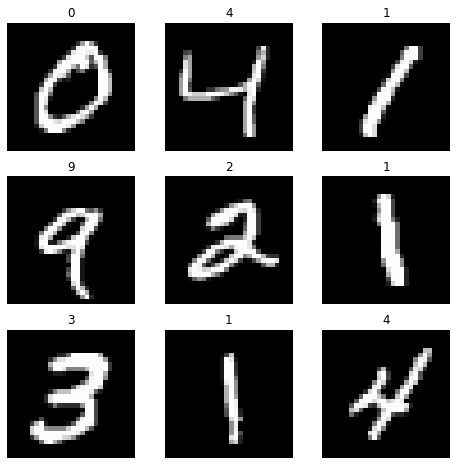

In [88]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols * rows + 1):
    img, label = train_x[i]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Training

In [91]:
for epoch in range(5):
    for i, (img, label) in enumerate(train_y):  
        
        img = img.reshape(-1, seq, input).to(cpu)
        label = label.to(cpu)
      
        outputs = model(img)
        loss = cr_en_loss(outputs, label)
        
        optim.zero_grad()
        loss.backward()
        optim.step()
        
        if (i) % 200 == 0:
            print (f'Epoch {i/200}, Loss: {loss.item():.5f}')

Epoch 0.0, Loss: 0.14453
Epoch 1.0, Loss: 0.12295
Epoch 0.0, Loss: 0.05810
Epoch 1.0, Loss: 0.07379
Epoch 0.0, Loss: 0.02917
Epoch 1.0, Loss: 0.00936
Epoch 0.0, Loss: 0.05095
Epoch 1.0, Loss: 0.01317
Epoch 0.0, Loss: 0.02115
Epoch 1.0, Loss: 0.02917


Testing

In [92]:
with torch.no_grad():
    corr_ans = 0
    total_data = 0
    for img, label in test_y:
        img = img.reshape(-1, seq, input).to(cpu)
        label = label.to(cpu)
        outputs = model(img)
        _, predicted = torch.max(outputs.data, 1)
        total_data += label.size(0)
        corr_ans += (predicted == label).sum()

    model_accuracy =  corr_ans / total_data
    print(f'Accuracy: {model_accuracy:.4f} ')

Accuracy: 0.9846 
